In [ ]:

# This block installs dmba package
!pip install package_name

Defaulting to user installation because normal site-packages is not writeable


In [ ]:

#setting up environment for analysis ans regression modelling
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import dmba

import matplotlib.pylab as plt

## Table 2.3
Load the West Roxbury data set

In [ ]:

#loading the dataset WestRoxbury
housing_dfGLR65 = pd.read_csv(r"C:\Users\gr0386\Downloads\WestRoxbury.csv")


Determine the shape of the data frame. It has 5802 rows and 14 columns

In [ ]:

#retrieving the shape of dataframe
housing_dfGLR65.shape

(5802, 14)

Show the top rows of the dataframe

In [ ]:

housing_dfGLR65.head()

In [ ]:
#GLR65
# print the first 10 records typing "housing_df.head(10)"
housing_dfGLR65.head(10)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
5,337.4,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1,Old
6,359.4,4521,5000,1954,3220,1916,2.0,7,3,1,1,1,0,NaN
7,320.4,4030,10000,1950,2208,1200,1.0,6,3,1,0,1,0,NaN
8,333.5,4195,6835,1958,2582,1092,1.0,5,3,1,0,1,1,Recent
9,409.4,5150,5093,1900,4818,2992,2.0,8,4,2,0,1,0,NaN


In [ ]:

# print the first 20 records
housing_dfGLR65.head(20)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
5,337.4,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1,Old
6,359.4,4521,5000,1954,3220,1916,2.0,7,3,1,1,1,0,NaN
7,320.4,4030,10000,1950,2208,1200,1.0,6,3,1,0,1,0,NaN
8,333.5,4195,6835,1958,2582,1092,1.0,5,3,1,0,1,1,Recent
9,409.4,5150,5093,1900,4818,2992,2.0,8,4,2,0,1,0,NaN


In [ ]:

# print the last 5 records by replacing the "head" by "tail"
housing_dfGLR65.tail(5)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,NaN
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,NaN
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,NaN
5801,447.6,5630,7406,1950,2510,1600,2.0,7,3,1,1,1,1,NaN


In [ ]:

# print the last 20 records
housing_dfGLR65.tail(20)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
5782,419.200,5273,7520,1935,3900,2178,1.5,9,3,2,1,1,1,NaN
5783,378.800,4765,4660,1930,2099,1323,2.0,6,3,1,1,1,1,NaN
5784,391.200,4921,4455,1935,2331,1439,2.0,7,3,1,1,1,1,NaN
5785,363.200,4569,4202,1941,2328,1410,2.0,6,3,1,1,1,1,NaN
5786,373.700,4701,7740,1928,2556,1549,2.0,7,3,1,0,1,0,NaN
5787,393.700,4952,10150,1950,3521,1538,1.0,5,2,1,1,1,1,NaN
5788,472.100,5939,7650,1932,3894,2293,2.0,10,2,1,1,1,2,NaN
5789,542.600,6825,8280,1928,3700,2102,2.0,8,3,2,1,1,1,Recent
5790,449.000,5648,7610,1938,3386,1847,2.0,7,3,1,1,1,1,NaN
5791,564.000,7095,5000,1950,4108,2421,2.0,7,4,1,2,1,1,Recent


## Cleanup
Preprocessing and cleaning up data is an important aspect of data analysis.

Show the column names.

In [ ]:

#retrieving coloumn names of the dataframe
housing_dfGLR65.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

Note that some column titles end with spaces and some consist of two space separated words. For further analysis it's more convenient to have column names which are single words.

In the rename command you can specify individual columns by name and provide their new name using a dictionary. Note that we use the `inplace` argument here. This means that the data frame is modified directly. By default, the modification is done on a copy and the copy returned by the method.

In [ ]:

#performing operations on the dataframe
housing_dfGLR65 = housing_dfGLR65.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_dfGLR65.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

We therefore strip trailing spaces and replace the remaining spaces with an underscore _. Instead of using the `rename` method, we create a modified copy of `columns` and assign to the `columns` field of the dataframe.

In [ ]:

#modify the coloumn names
housing_dfGLR65.columns = [s.strip().replace(' ', '_') for s in housing_dfGLR65.columns]
housing_dfGLR65.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

## Accessing subsets of the data
Pandas uses two methods to access rows in a data frame; `loc` and `iloc`. The `loc` method is more general and allows accessing rows using labels. The `iloc` method on the other hand only allows using integer numbers. To specify a range of rows use the slice notation, e.g. `0:9`.

To show the first four rows of the data frame, you can use the following commands.

In [ ]:

#Selecting rows using 'loc' from the dataframe
housing_dfGLR65.loc[0:3]  # for loc, the second index in the slice is inclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


In [ ]:

# print the first 12 rows instead of first 4 rows
housing_dfGLR65.loc[0:11]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
5,337.4,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1,Old
6,359.4,4521,5000,1954,3220,1916,2.0,7,3,1,1,1,0,NaN
7,320.4,4030,10000,1950,2208,1200,1.0,6,3,1,0,1,0,NaN
8,333.5,4195,6835,1958,2582,1092,1.0,5,3,1,0,1,1,Recent
9,409.4,5150,5093,1900,4818,2992,2.0,8,4,2,0,1,0,NaN


In [ ]:

#using 'loc' to select rows
housing_dfGLR65.iloc[0:4]  # for loc, the second index in the slice is exclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


Note the difference in the two methods with respect to the slice notation! For consistency with how slices are defined in Python, we will use the `iloc` method mostly from here on.

Next, show the first ten rows of the first column

In [ ]:

#extracting the values from coloumn'TOTAL_VALUE' for first 10 rows
housing_dfGLR65['TOTAL_VALUE'].iloc[0:10]
housing_dfGLR65.iloc[0:10]['TOTAL_VALUE']  # the order is not important
housing_dfGLR65.iloc[0:10].TOTAL_VALUE

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [ ]:

#print the first 5 rows of TOTAL_VALUE
housing_dfGLR65['TOTAL_VALUE'].iloc[0:5]
housing_dfGLR65.iloc[0:5]['TOTAL_VALUE']  # the order is not important
housing_dfGLR65.iloc[0:5].TOTAL_VALUE

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
Name: TOTAL_VALUE, dtype: float64

Show the fifth row of the first 10 columns. The `iloc` methods allows specifying the rows and columns within one set of brackets. `dataframe.iloc[rows, columns]`

In [ ]:

#Extracting subset of values from the dataframe
housing_dfGLR65.iloc[4][0:10]
housing_dfGLR65.iloc[4, 0:10]  # this is equivalent

TOTAL_VALUE    331.5
TAX             4170
LOT_SQFT        5000
YR_BUILT        1910
GROSS_AREA      2370
LIVING_AREA     1438
FLOORS           2.0
ROOMS              7
BEDROOMS           3
FULL_BATH          2
Name: 4, dtype: object

If you prefer to preserve the data frame format, use a slice for the rows as well.

In [ ]:

#selecting a speciifc dataset of rows and coloums using 'iloc'
housing_dfGLR65.iloc[4:5, 0:10]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


Use the `pd.concat` method if you want to combine non-consecutive columns into a new data frame. The `axis` argument specifies the dimension along which the concatenation happens, 0=rows, 1=columns.

In [ ]:

#joining the two subets of dataframe by using concat
pd.concat([housing_dfGLR65.iloc[4:6,0:2], housing_dfGLR65.iloc[4:6,4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


To specify a full column, use the `:` on its own.
```
housing_df.iloc[:,0:1]
```
A often more practical way is to use the column name as follows

In [ ]:

#selecting the coloumn from dataframe
housing_dfGLR65['TOTAL_VALUE']

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

We can subset the column using a slice

In [ ]:

# selecting values from 'TOTAL_VALUE'
housing_dfGLR65['TOTAL_VALUE'][0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

Pandas provides a number of ways to access statistics of the columns.

In [ ]:

#to print the number of rows and mean value of 'TOTAL_VALUE'
print('Number of rows ', len(housing_dfGLR65['TOTAL_VALUE']))
print('Mean of TOTAL_VALUE ', housing_dfGLR65['TOTAL_VALUE'].mean())

Number of rows  5802
Mean of TOTAL_VALUE  392.6857149258877


A data frame also has the method `describe` that prints a number of common statistics

In [ ]:

# prints statistcis by 'describe' method
housing_dfGLR65['TOTAL_VALUE'].describe()

count    5802.000000
mean      392.685715
std        99.177414
min       105.000000
25%       325.125000
50%       375.900000
75%       438.775000
max      1217.800000
Name: TOTAL_VALUE, dtype: float64

In [ ]:

# generate the descriptive statistics for TAX instead of TOTAL_VALUE
housing_dfGLR65['TAX'].describe()

count     5802.000000
mean      4939.485867
std       1247.649118
min       1320.000000
25%       4089.500000
50%       4728.000000
75%       5519.500000
max      15319.000000
Name: TAX, dtype: float64

In [ ]:

#print statistics of enitre dataframe
housing_dfGLR65.describe()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


## Table 2.4
Use the `sample` method to retrieve a random sample of observations. Here we sample 5 observations without replacement.

In [ ]:

#randomly selecting the sample of 5 rows from dataframe
housing_dfGLR65.sample(5)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
1392,353.1,4442,8450,1950,2766,1120,1.0,7,3,2,0,1,1,NaN
1236,414.2,5210,6000,1989,2724,1740,2.0,7,4,1,1,1,1,NaN
746,271.5,3415,2896,1984,2464,1596,2.0,6,3,1,1,1,1,NaN
3178,655.6,8247,8333,1910,6020,3558,2.5,11,6,2,0,1,1,Old
4648,512.3,6444,13654,1930,3319,1939,2.0,8,3,1,1,1,1,Old


In [ ]:

# draw a random sample of 10 records instead of 5
housing_dfGLR65.sample(10)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
1179,261.7,3292,4226,1958,2114,1025,1.0,5,3,1,0,1,1,NaN
4175,412.2,5185,5893,1950,2555,1400,2.0,6,3,1,1,1,1,NaN
2663,383.0,4818,3668,1925,2672,1542,2.0,7,3,1,1,1,0,NaN
4663,409.5,5151,5397,1965,2455,1530,2.0,6,3,1,1,1,2,Recent
3091,496.9,6251,7476,1910,2714,1658,2.0,8,3,2,1,1,1,Recent
4537,432.5,5440,4992,1956,2520,1834,1.0,5,3,1,0,1,1,Recent
1310,297.8,3746,8307,1925,1810,800,1.0,5,2,1,0,1,0,NaN
90,356.8,4488,5005,1996,2660,1680,2.0,6,3,2,1,1,1,NaN
1057,312.7,3933,4320,1950,2316,1488,2.0,7,3,2,0,1,0,Old
2527,418.2,5260,7146,1992,3198,1864,2.0,7,4,2,1,1,1,NaN


The sample method allows to specify weights for the individual rows. We use this here to oversample houses with over 10 rooms.

In [ ]:

#performing sampling of the code from dataframe
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
1917,397.8,5004,3906,1860,3830,2280,2.0,11,7,2,0,1,0,Old
5112,397.2,4996,5000,1959,3184,1476,1.0,5,2,2,0,1,1,NaN
3715,411.0,5170,5387,1920,2823,1932,2.0,11,4,1,1,1,1,Recent
4057,430.7,5418,4971,1930,3981,1890,1.0,11,3,1,1,1,0,Old
3718,730.9,9194,22956,1900,4500,2909,2.5,11,6,3,1,1,0,Recent


## Table 2.5

In [ ]:

#retrieving and displaying coloumn names from the dataframe
housing_df.columns


Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

The REMODEL column is a factor, so we need to change it's type.

In [ ]:

# performing operations for'REMODEL' coloumn
print(housing_dfGLR65.REMODEL.dtype)
housing_dfGLR65.REMODEL = housing_dfGLR65.REMODEL.astype('category')
print(housing_dfGLR65.REMODEL.cat.categories)  # It can take one of three levels
print(housing_dfGLR65.REMODEL.dtype)  # Type is now 'category'

object
Index(['Old', 'Recent'], dtype='object')
category


Other columns also have types.

In [ ]:

#Print datatypes of 'bedroom' of 'total_value' columns in dataframe
print(housing_dfGLR65.BEDROOMS.dtype)  # BEDROOMS is an integer variable
print(housing_dfGLR65.TOTAL_VALUE.dtype)  # Total_Value is a numeric variable

int64
float64


It's also possible to the all columns data types

In [ ]:

#displaying datatypes of dataframe
housing_dfGLR65.dtypes

TOTAL_VALUE     float64
TAX               int64
LOT_SQFT          int64
YR_BUILT          int64
GROSS_AREA        int64
LIVING_AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL_BATH         int64
HALF_BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL        category
dtype: object


Pandas provides a method to convert factors into dummy variables. In older versions of pandas, the missing values were treated as a separate category. In the book code, we therefore removed the first dummy variable. With newer versions of pandas, we can now call `get_dummies` with the default value of `drop_first=False`.

In [ ]:

# the missing values will create a third category
# use the arguments drop_first and dummy_na to control the outcome
housing_dfGLR65 = pd.get_dummies(housing_dfGLR65, prefix_sep='_', dtype=int)
housing_dfGLR65.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [ ]:

#displaying first 5 rows of the dataframe but only from 'REMODEL_old' to ' REMODEL_Recent'
print(housing_dfGLR65.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5))

   REMODEL_Old  REMODEL_Recent
0            0               0
1            0               1
2            0               0
3            0               0
4            0               0



To illustrate missing data procedures, we first convert a few entries for bedrooms to NA's. Then we impute these missing values using the median of the remaining values.

In [ ]:

#check and modify 'BEDROOMS' by giving some values and printing values
print('Number of rows with valid BEDROOMS values before: ',
      housing_dfGLR65['BEDROOMS'].count())
missingRows = housing_dfGLR65.sample(10).index
housing_dfGLR65.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ',
      housing_dfGLR65['BEDROOMS'].count())
housing_dfGLR65['BEDROOMS'].count()

Number of rows with valid BEDROOMS values before:  5802
Number of rows with valid BEDROOMS values after setting to NAN:  5792


5792

In [ ]:

# remove rows with missing values
reduced_dfGLR65= housing_dfGLR65.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_dfGLR65))

Number of rows after removing rows with missing values:  5792


Replace the missing values using the median of the remaining values.

By default, the `median` method of a pandas dataframe ignores NA values. This is in contrast to R where this must be specified explicitly.

In [ ]:

#handles missing values in 'BEDROOMS' coloumn by filling meadian value
medianBedrooms = housing_dfGLR65['BEDROOMS'].median()
housing_dfGLR65.BEDROOMS = housing_dfGLR65.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',
      housing_dfGLR65['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after filling NA values:  5802


 scaling data

In [ ]:

#normalising dataframe using pandas and sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_dfGLR65.copy()

# Normalizing a data frame

# pandas:
norm_dfGLR65 = (housing_dfGLR65 - housing_dfGLR65.mean()) / housing_dfGLR65.std()

# scikit-learn:
scaler = StandardScaler()
norm_dfGLR65= pd.DataFrame(scaler.fit_transform(housing_dfGLR65),
                       index=housing_dfGLR65.index, columns=housing_dfGLR65.columns)
# the result of the transformation is a numpy array, we convert it into a dataframe

# Rescaling a data frame
# pandas:
rescaled_dfGLR65 = (housing_dfGLR65 - housing_dfGLR65.min()) / (housing_dfGLR65.max() - housing_dfGLR65.min())

# scikit-learn:
scaler = MinMaxScaler()
rescaled_dfGLR65 = pd.DataFrame(scaler.fit_transform(housing_dfGLR65),
                       index=housing_dfGLR65.index, columns=housing_dfGLR65.columns)

The standardization of the dataset may give a <code>DataConversionWarning</code>. This informs you that the integer columns in the dataframe are automatically converted to real numbers (<code>float64</code>). This is expected and you can therefore ignore this warning. If you want to suppress the warning, you can explicitly convert the integer columns to real numbers</p>
<pre>
# Option 1: Identify all integer columns, remove personal loan,
# and change their type
intColumns = [c for c in housing_df.columns if housing_df[c].dtype == 'int']
housing_df[intColumns] = housing_df[intColumns].astype('float64')
</pre>
Alternatively, you can suppress the warning as follows:
<pre>
# Option 2: use the warnings package to suppress the display of the warning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    norm_df = pd.DataFrame(scaler.fit_transform(housing_df),
                       index=housing_df.index, columns=housing_df.columns)    
</pre>


Split the dataset into training (60%) and validation (40%) sets. Randomly sample 60% of the dataset into a new data frame `trainData`. The remaining 40% serve as validation.

In [ ]:

# random_state is set to a defined value to get the same partitions when re-running the code
trainData= housing_dfGLR65.sample(frac=0.6, random_state=1)
# assign rows that are not already in the training set, into validation
validData = housing_dfGLR65.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

# alternative way using scikit-learn
trainData, validData = train_test_split(housing_dfGLR65, test_size=0.40, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (3481, 15)
Validation :  (2321, 15)

Training   :  (3481, 15)
Validation :  (2321, 15)


Partition the dataset into training (50%), validation (30%), and test sets (20%).

In [ ]:

# randomly sample 50% of the row IDs for training
trainData = housing_dfGLR65.sample(frac=0.5, random_state=1)
# sample 30% of the row IDs into the validation set, drawing only from records
# not already in the training set; 60% of 50% is 30%
validData = housing_dfGLR65.drop(trainData.index).sample(frac=0.6, random_state=1)
# the remaining 20% rows serve as test
testData = housing_dfGLR65.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

# alternative way using scikit-learn
trainData, temp = train_test_split(housing_dfGLR65, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)

Training   :  (2901, 15)
Validation :  (1741, 15)
Test       :  (1160, 15)

Training   :  (2901, 15)
Validation :  (1740, 15)
Test       :  (1161, 15)



The statsmodels package allows to define linear regression models using a formula definition similar to R. In contrast to R, all variables need to be specified explicitly. We construct a formula excluding the dependent variable and the `TAX` column

In [ ]:

# Data loading and preprocessing
housing_dfGLR65 = dmba.load_data('WestRoxbury.csv')
housing_dfGLR65.columns = [s.strip().replace(' ', '_') for s in housing_dfGLR65.columns]
housing_dfGLR65 = pd.get_dummies(housing_dfGLR65, prefix_sep='_', drop_first=False, dtype=int)

excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_dfGLR65.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_dfGLR65[predictors]
y = housing_dfGLR65[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y,
    'predicted': train_pred,
    'residual': train_y - train_pred
})
print(train_results.head())

      TOTAL_VALUE   predicted   residual
2024        392.0  387.726258   4.273742
5140        476.3  430.785540  45.514460
5259        367.4  384.042952 -16.642952
421         350.3  369.005551 -18.705551
1401        348.1  314.725722  33.374278


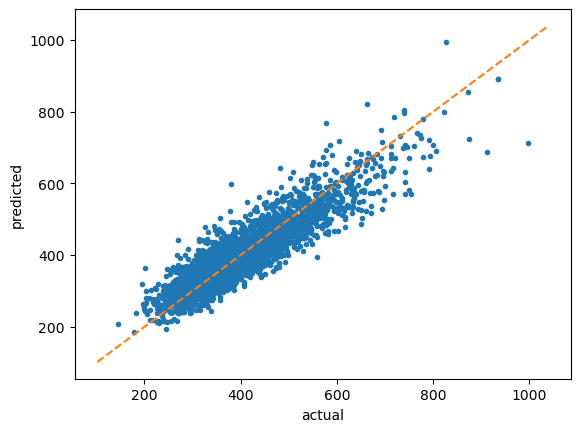

In [ ]:
#GLR65
#creating a scatterplot
plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

Predict the validation data

In [ ]:
#GLR65
#evaluating the models performance
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y,
    'predicted': valid_pred,
    'residual': valid_y - valid_pred
})
print(valid_results.head())

      TOTAL_VALUE   predicted   residual
1822        462.0  406.946377  55.053623
1998        370.4  362.888928   7.511072
5126        407.4  390.287208  17.112792
808         316.1  382.470203 -66.370203
4034        393.2  434.334998 -41.134998


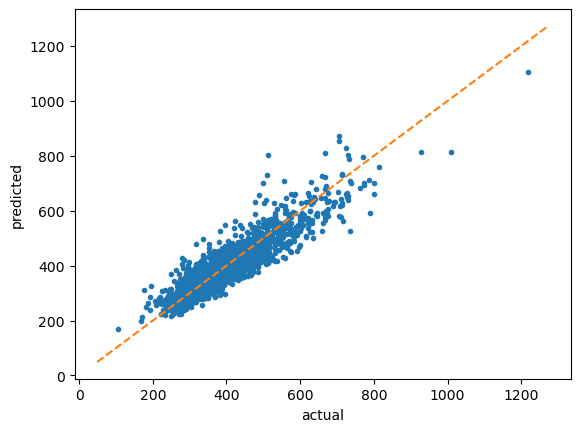

In [ ]:
#GLR65
#creating scatter plot
plt.plot(valid_results.TOTAL_VALUE, valid_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()


We can use the metrics that scikit-learn provides.

In [ ]:
#GLR65
#calculate and print r square
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.TOTAL_VALUE, valid_results.predicted))

Training set r2:  0.8097361461091853
Validation set r2:  0.8171327286147877


In [ ]:
#GLR65
# import the utility function regressionSummary
from dmba import regressionSummary

# training set
regressionSummary(train_results.TOTAL_VALUE, train_results.predicted)

# validation set
regressionSummary(valid_results.TOTAL_VALUE, valid_results.predicted)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 43.0306
            Mean Absolute Error (MAE) : 32.6042
          Mean Percentage Error (MPE) : -1.1116
Mean Absolute Percentage Error (MAPE) : 8.4886

Regression statistics

                      Mean Error (ME) : -0.1463
       Root Mean Squared Error (RMSE) : 42.7292
            Mean Absolute Error (MAE) : 31.9663
          Mean Percentage Error (MPE) : -1.0884
Mean Absolute Percentage Error (MAPE) : 8.3283


In [ ]:
#GLR65
#create a data frame with coloumns
dfGLR65 = pd.DataFrame({'Expenditure': [239, 364,602, 644, 770, 789, 911],
                   'Revenue': [514, 789, 550, 1386, 1394, 1440, 1354]})
dfGLR65

,Expenditure,Revenue
0,239,514
1,364,789
2,602,550
3,644,1386
4,770,1394
5,789,1440
6,911,1354


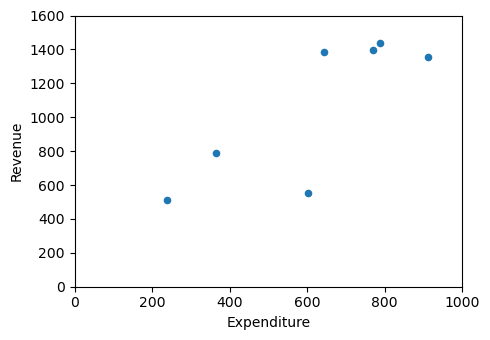

In [ ]:
#GLR65
#creating a scatterplot
dfGLR65.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.tight_layout()  # Increase the separation between the plots
plt.show()

In [ ]:
#GLR65
#performing interpolation on 'EXPENDITURE' and ' REVENUE'
x = list(dfGLR65.Expenditure)
y = list(dfGLR65.Revenue)

from scipy import interpolate
f = interpolate.PchipInterpolator(x, y)

x_new = np.linspace(x[0], x[-1], 100)
y_new = [f(xi) for xi in x_new]

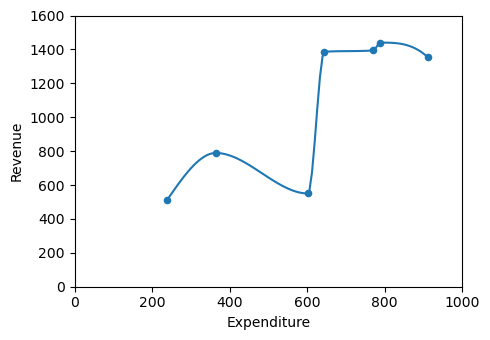

In [ ]:
#GLR65
#enhancing the before scatterplot
dfGLR65.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.plot(x_new, y_new)
plt.tight_layout()  # Increase the separation between the plots
plt.show()